# Discrete Fourier Transform

<div align=center><img src="image/24.02.02-time_frequency.png" width="500"></div>

## DFT

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}
$$

- N=number of samples 
- n= current sample
- k=current frequency, where $k\in[0,N-1]$
- $x_n=$ the sine value at sample n
- $X_k$ = The DFT which include information of both amplitude and phase

> note $e^{i\cdot x} = cosx+i\cdot sinx$

$$
amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}
$$

$$
phase = atan2(Im(X_k), Re(X_k))
$$

where $Im(X_k)$ and $Re(X_k)$ are the imagery and real part of the complex number,$atan2$ is the two-argument form of the $arctan$ function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

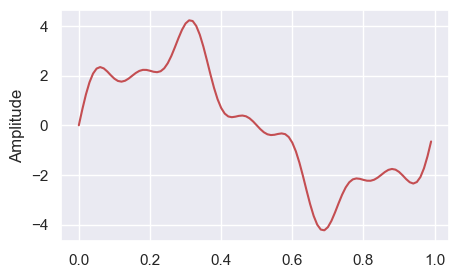

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (5, 3))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

### Matrix Form of DFT

$$
\mathbf{X} = \mathbf{F}\mathbf{x}
$$

$$
\mathbf{X} = \begin{bmatrix}
X_0 \\
X_1 \\
X_2 \\
\vdots \\
X_{N-1}
\end{bmatrix}
\quad
\mathbf{F} = \begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & W & W^2 & \cdots & W^{N-1} \\
1 & W^2 & W^4 & \cdots & W^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & W^{N-1} & W^{2(N-1)} & \cdots & W^{(N-1)(N-1)}
\end{bmatrix}
\quad
\mathbf{x} = \begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\vdots \\
x_{N-1}
\end{bmatrix}
$$

where $W=e^{-i2\pi/N}$


In [3]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x

    Parameters
    ----------
    @param x : np.array of floats
        A signal
    @return X : np.array of complex numbers
        The DFT of the signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) # shape (N, N)
    
    X = np.dot(e, x)
    
    return X

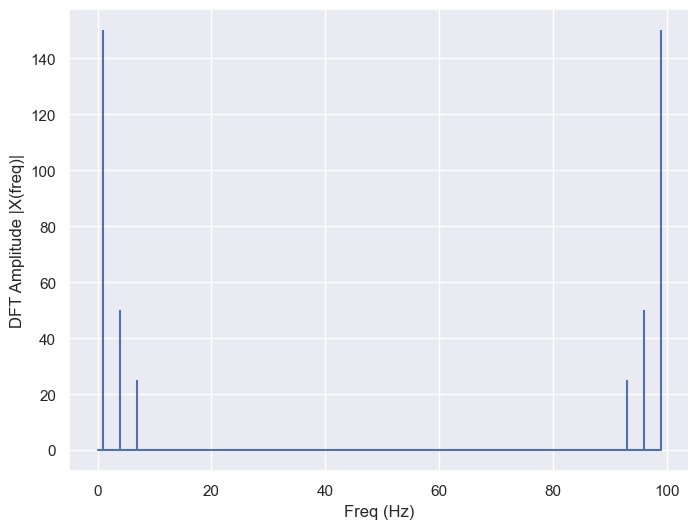

In [5]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(
    freq, 
    abs(X), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) # note that the abs() is used to 
# get the magnitude of the complex number

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

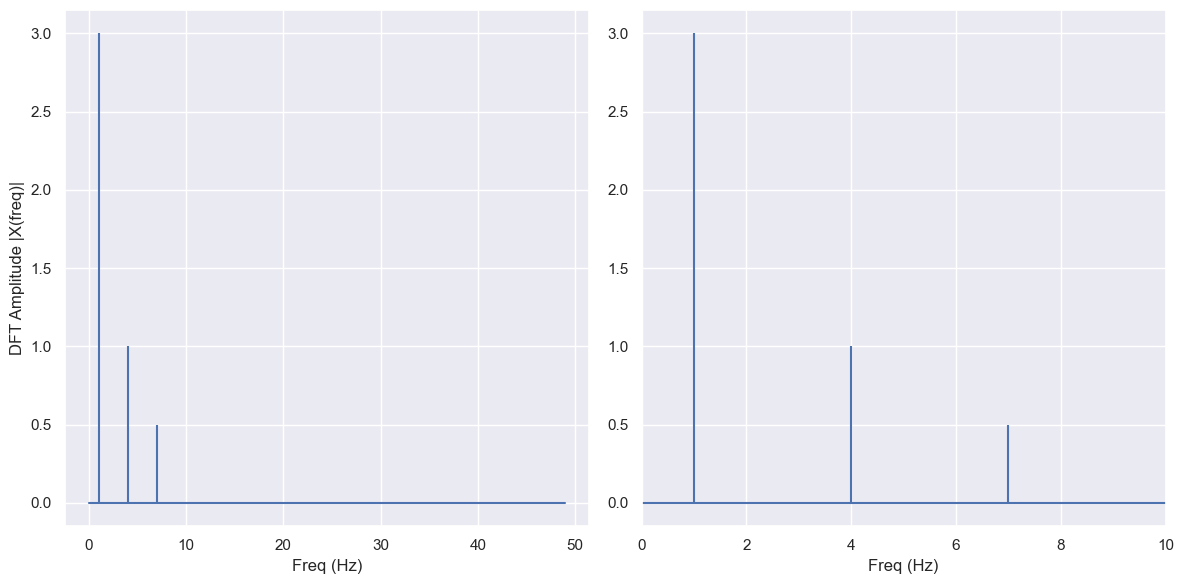

In [6]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(
    f_oneside, abs(X_oneside), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(
    f_oneside, abs(X_oneside),
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

> 我们可以看到最上面的Freq-Amplitude图是对称的，这是因为复数的原因

## The inverse DFT

$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}
$$

### Matrix Form of Inverse DFT

$$
\mathbf{x} = \mathbf{F}^{-1}\mathbf{X}
$$


## The limit of DFT

- `DFT`只适用于data points少一点的情况
- 多了就需要用到`FFT`

In [7]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [8]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr)) # use %timeit to get the running time

220 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
# sampling rate 20000 # this kill my computer
# sr = 20000
# %timeit DFT(gen_sig(sr))